In [1]:
import cv2
import numpy as np
import scipy.io
import os
import umap
import matplotlib.pyplot as plt

c:\Users\Administrator\miniconda3\envs\micelab\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = './geofeat/Cap-C973-basal.csv'
feat = np.genfromtxt(path, delimiter=",")

(10418, 2)


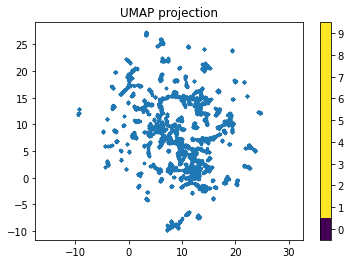

In [5]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(feat)
print(embedding.shape)

plt.scatter(embedding[:, 0], embedding[:, 1],  cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection')
plt.show()

In [2]:
def seg_img(vid_path, label,out_path='./result'):
    '''
    save frame clusters to out_path by classes(label)
    label : n*1 label
    '''
    for i in np.unique(label):
        pathk = out_path+'/'+str(i)
        if not os.path.isdir(pathk):
            os.makedirs(pathk)

    cap = cv2.VideoCapture(vid_path)
    i=0
    for lb in label:
        i=i+1
        pathk = out_path+'/'+str(lb[0])+'/'
        ret, frame = cap.read()
        if not ret:
            break
        f= pathk+str(i)+'.jpg'
        cv2.imwrite(f, frame)
    

In [3]:
label = scipy.io.loadmat('./labels.mat')['labels'].T
vid_path = './vid/Cap-C973/basal_color.avi'
seg_img(vid_path, label)